## importing libraries

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import random
plt.style.use("default")

## Dividing dataset into training, validation and testing

In [3]:
#rb = read binary #wb = write binary #.p extension = pickle extension
with open("./data/train.p", mode = "rb") as training_data:
    train = pickle.load(training_data)
with open("./data/valid.p", mode = "rb") as validation_data:
    valid = pickle.load(validation_data)
with open("./data/test.p", mode = "rb") as testing_data:
    test = pickle.load(testing_data)

#### Why we need validation data?
- used for cross-validation which is performed to asses training quality as training proceeds
- cross-validation is used to overcome over-fitting which occurs when algorithm focuses on training set details at cost of losing generalization ability

In [4]:
# display the types
print("Type of the train data: ", type(train))

Type of the train data:  <class 'dict'>


In [5]:
# display the keys
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
def show_type_and_shape(key):
    print(f"Type of {key:<{len(key)}}: {type(train[key])} === shape: {train[key].shape}")
    
for k, _ in train.items():
    show_type_and_shape(k)

Type of coords: <class 'numpy.ndarray'> === shape: (34799, 4)
Type of labels: <class 'numpy.ndarray'> === shape: (34799,)
Type of features: <class 'numpy.ndarray'> === shape: (34799, 32, 32, 3)
Type of sizes: <class 'numpy.ndarray'> === shape: (34799, 2)


In [36]:
train["coords"][:2]

array([[ 6,  5, 21, 20],
       [ 6,  6, 22, 22]], dtype=uint8)

In [37]:
train["labels"][:2]

array([41, 41], dtype=uint8)

In [38]:
train["sizes"][:2]

array([[26, 25],
       [27, 27]], dtype=uint8)

In [5]:
X_train, y_train = train["features"], train["labels"]

In [40]:
print(X_train.shape, y_train.shape)
# 34799 images, 32*32 pixels, color = 3

(34799, 32, 32, 3) (34799,)


In [39]:
X_train[0].shape

(32, 32, 3)

In [6]:
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


In [7]:
# perscentage of data
total = len(y_train) + len(y_test) + len(y_valid)
print(f"totla data: {total}")
print(f"train data: {(len(y_train)/total)*100:0.2f}%")
print(f"test data: {(len(y_test)/total)*100:0.2f}%")
print(f"valid data: {(len(y_valid)/total)*100:0.2f}%")

totla data: 51839
train data: 67.13%
test data: 24.36%
valid data: 8.51%


## Perform image visualization

In [8]:
sign_labels = {0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)",
     3: "Speed limit (60km/h)", 4: "Speed limit (70km/h)", 5: "Speed limit (30km/h)",
     6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)", 8: "Speed limit (120km/h)",
     9: "No passing", 10: "No passing for vehicles over 3.5 metric tons",
     11: "Right-of-way at the next intersection", 12: "Priority road", 13: "Yield", 14: "Stop",
     15: "No vehicles", 16: "Vehicles over 3.5 metric tons prohibited", 17: "No entry",
     18: "General caution", 19: "Dangerous curve to the left", 20: "Dangerous curve to the right",
     21: "Double curve", 22: "Bumpy road", 23: "Slippery road", 24: "Road narrows on the right",
     25: "Road work", 26: "Traffic signals", 27: "Pedestrians", 28: "Children crossing",
     29: "Bicycle crossing", 30: "Beware of ice/snow", 31: "Wild animals crossing",
     32: "End of all speed and passing limits", 33: "Turn right ahead", 34: "Turn left ahead",
     35: "Ahead only", 36: "Go straight or right", 37: "Go straight or left", 38: "Keep right",
     39: "Keep left", 40: "Roundabout mandatory", 41: "End of no passing",
     42: "End of no passing by vehicles over 3.5 metric tons"}

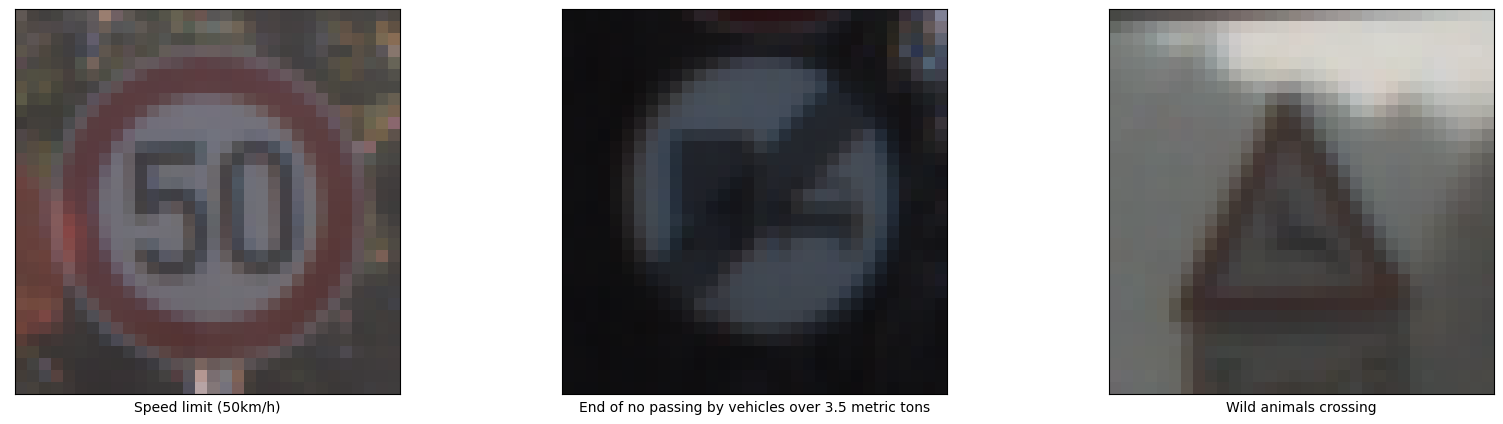

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_train.shape[0]))
    axi.imshow(X_train[idx])
    axi.set(xticks=[], yticks=[])
    axi.set(xlabel=sign_labels[y_train[idx]])

#### Another way of visualizing

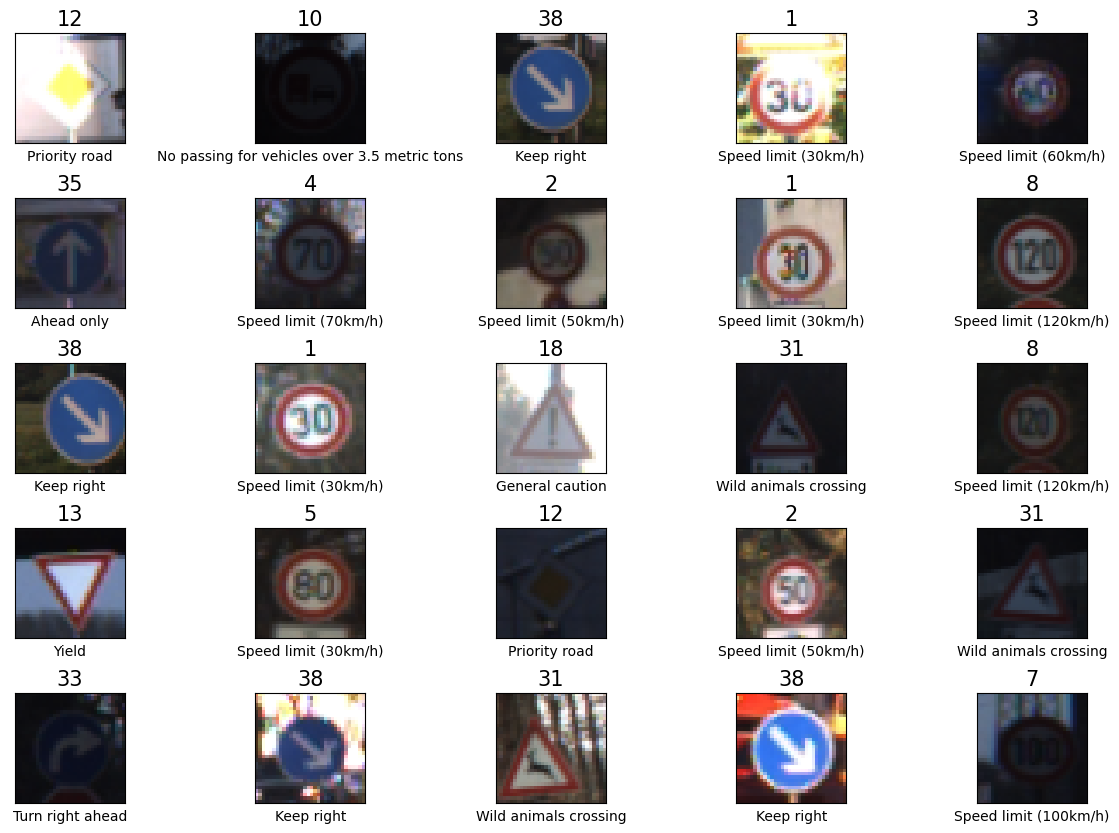

In [56]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize = (15,10))

# subplots gives 2D array. We need to convert it into 1D array
axes = ax.ravel() # flaten the 5 x 5 matrix into 25 array

for i in range(5*5):
    index = np.random.randint(0, X_train.shape[0])
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].set_xlabel(sign_labels[y_train[index]], fontsize = 10)
    axes[i].set(xticks=[], yticks=[])
    
plt.subplots_adjust(hspace = 0.5)

In [9]:
data = np.zeros(len(sign_labels))

for i in range(len(X_train)):
    data[y_train[i]] += 1

In [80]:
data

array([ 180., 1980., 2010., 1260., 1770., 1650.,  360., 1290., 1260.,
       1320., 1800., 1170., 1890., 1920.,  690.,  540.,  360.,  990.,
       1080.,  180.,  300.,  270.,  330.,  450.,  240., 1350.,  540.,
        210.,  480.,  240.,  390.,  690.,  210.,  599.,  360., 1080.,
        330.,  180., 1860.,  270.,  300.,  210.,  210.])

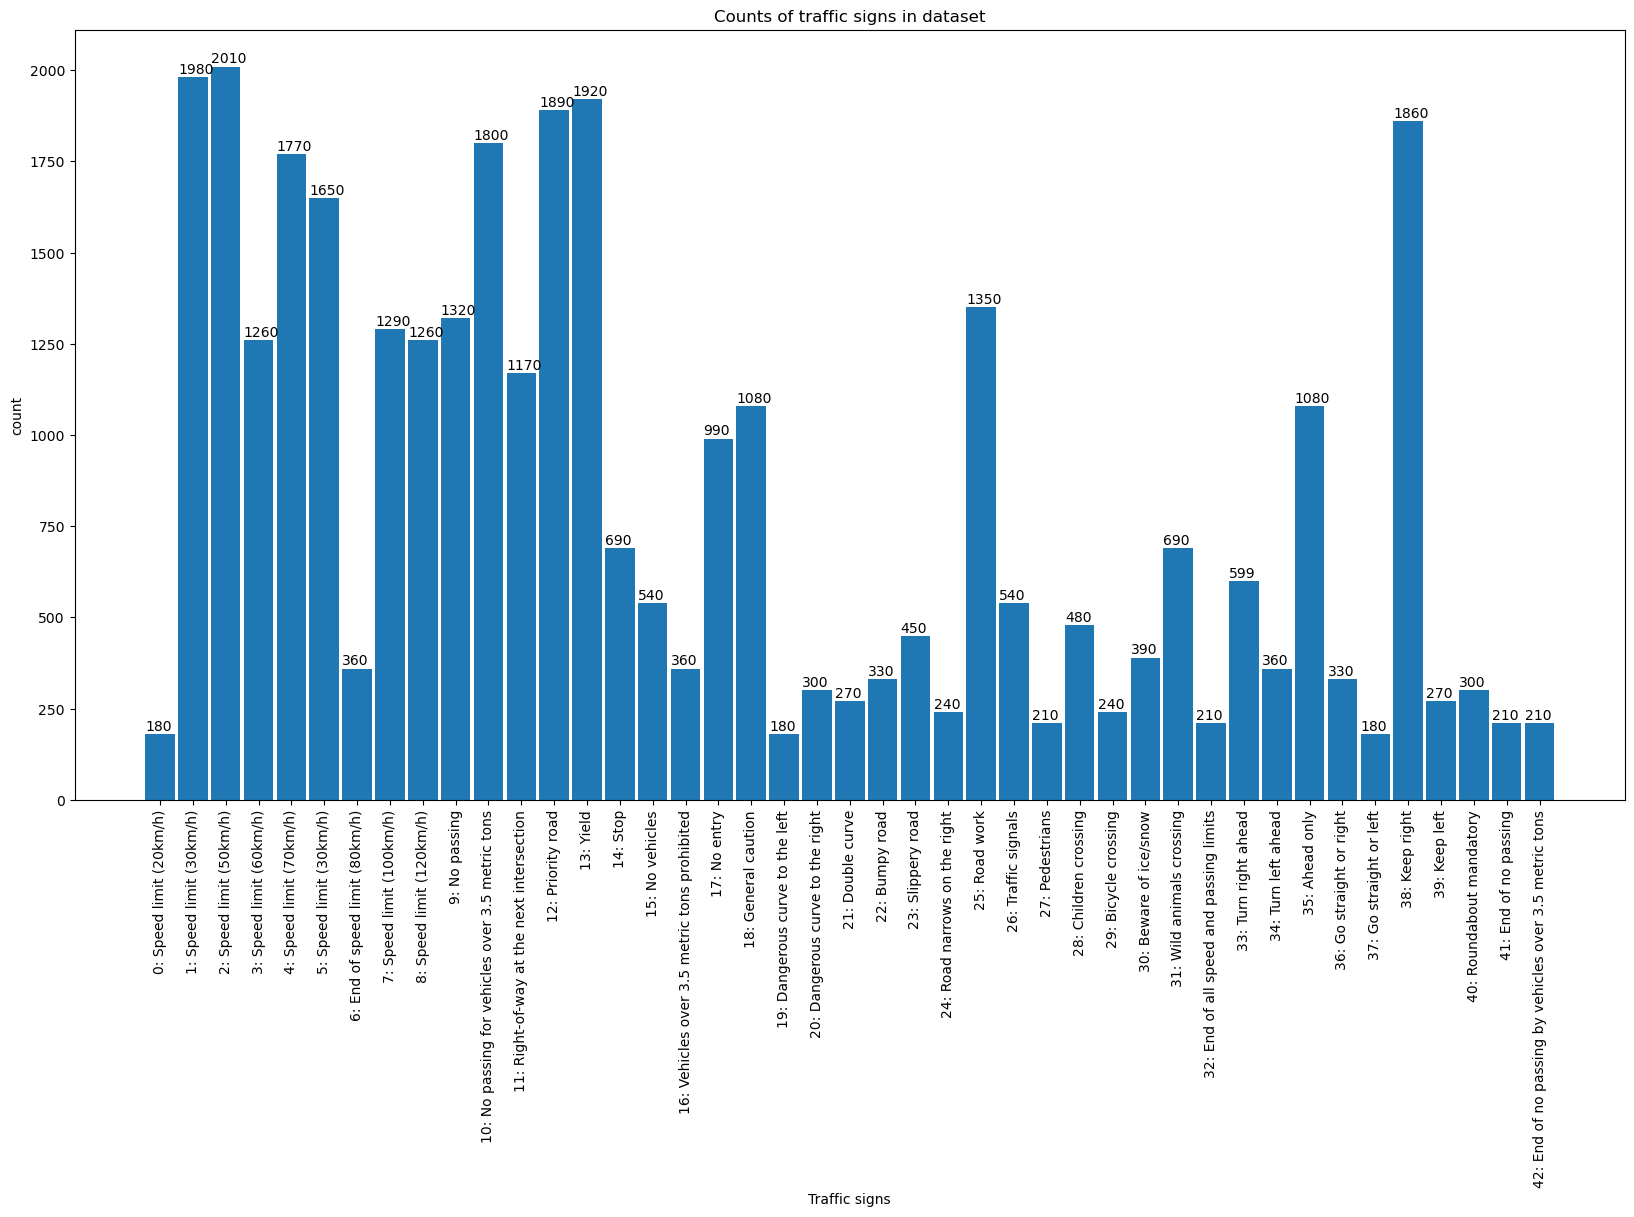

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))

bars = ax.bar(sign_labels.keys(), data, width=0.9)
ax.set(xlabel="Traffic signs", ylabel="count")
ax.set_title('Counts of traffic signs in dataset')
ax.set_xticks(np.arange(len(sign_labels)))
ax.set_xticklabels(labels=[str(i)+": "+sign_labels[i] for i in range(len(sign_labels))],
                   rotation=90)

#show value on top of the bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+10, str(int(yval)))

#### obseravtion:

classes = 0, 19, 21, 24, 27, 29, 32, 37, 39, 41, 42 < 300 training image. Possibility of misclassification

##### Let's see what is ravel()

In [14]:
arr_2d = np.array([[0, 1, 2],
                   [3, 4, 5],
                   [6, 7, 8]])

flat_array = np.ravel(arr_2d)
print("Flattened view: ", flat_array)

Flattened view:  [0 1 2 3 4 5 6 7 8]


## CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [11]:
# we're just shuffling the images because we're not letting the machine to learn the order of the items
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

In [17]:
test = np.sum(X_valid/3, axis=3, keepdims=True)

In [18]:
print(X_valid.shape, test.shape)
print(X_valid[0].shape, test[0].shape)
X_valid[0][0][0], test[0][0][0]

(4410, 32, 32, 3) (4410, 32, 32, 1)
(32, 32, 3) (32, 32, 1)


(array([162, 161, 142], dtype=uint8), array([155.]))

In [19]:
# taking mean of 3 color channels (RGB)
print(np.sum(X_valid[0][0][0]))
print(np.sum(X_valid[0][0][0]/3))

465
155.0


In [20]:
# The keepdims parameter enables to keep the number of dimensions of the output as same as the input.
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [21]:
# check what happens if we don't provide keepdims attribute
X_valid_gray_test = np.sum(X_valid/3, axis=3)
X_valid_gray_test.shape

(4410, 32, 32)

In [18]:
print(X_train.ndim)
print(X_train.shape)
print(X_train_gray.shape)

4
(34799, 32, 32, 3)
(34799, 32, 32, 1)


In [22]:
X_train_gray_norm = (X_train_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

In [23]:
X_train_gray_norm

array([[[[ 0.89583333],
         [ 0.90625   ],
         [ 0.921875  ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.88541667],
         [ 0.90104167],
         [ 0.921875  ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.88802083],
         [ 0.90104167],
         [ 0.90625   ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[-0.58854167],
         [-0.78645833],
         [-0.67447917],
         ...,
         [-0.5625    ],
         [-0.7109375 ],
         [-0.71875   ]],

        [[-0.56770833],
         [-0.7734375 ],
         [-0.67447917],
         ...,
         [-0.5703125 ],
         [-0.72395833],
         [-0.72135417]],

        [[-0.55208333],
         [-0.76302083],
         [-0.6640625 ],
         ...,
         [-0.56770833],
         [-0.73177083],
         [-0.7265625 ]]],


       [[[ 0.9921875 ],


In [24]:
a = X_train_gray.squeeze()
X_train_gray.shape, a.shape

((34799, 32, 32, 1), (34799, 32, 32))

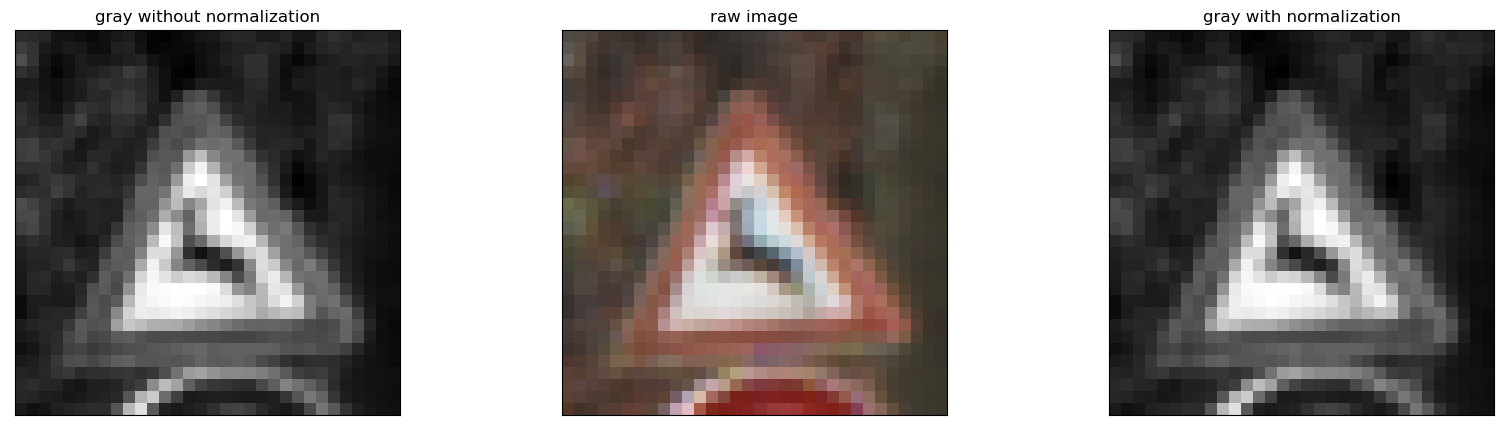

In [28]:
i = random.randint(1, len(X_train_gray))

fix, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax1.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
ax1.set_title("gray without normalization")
ax1.set(xticks=[], yticks=[])

ax2.imshow(X_train[i])
ax2.set_title("raw image")
ax2.set(xticks=[], yticks=[])

ax3.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')
ax3.set_title("gray with normalization")
ax3.set(xticks=[], yticks=[]);

## TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

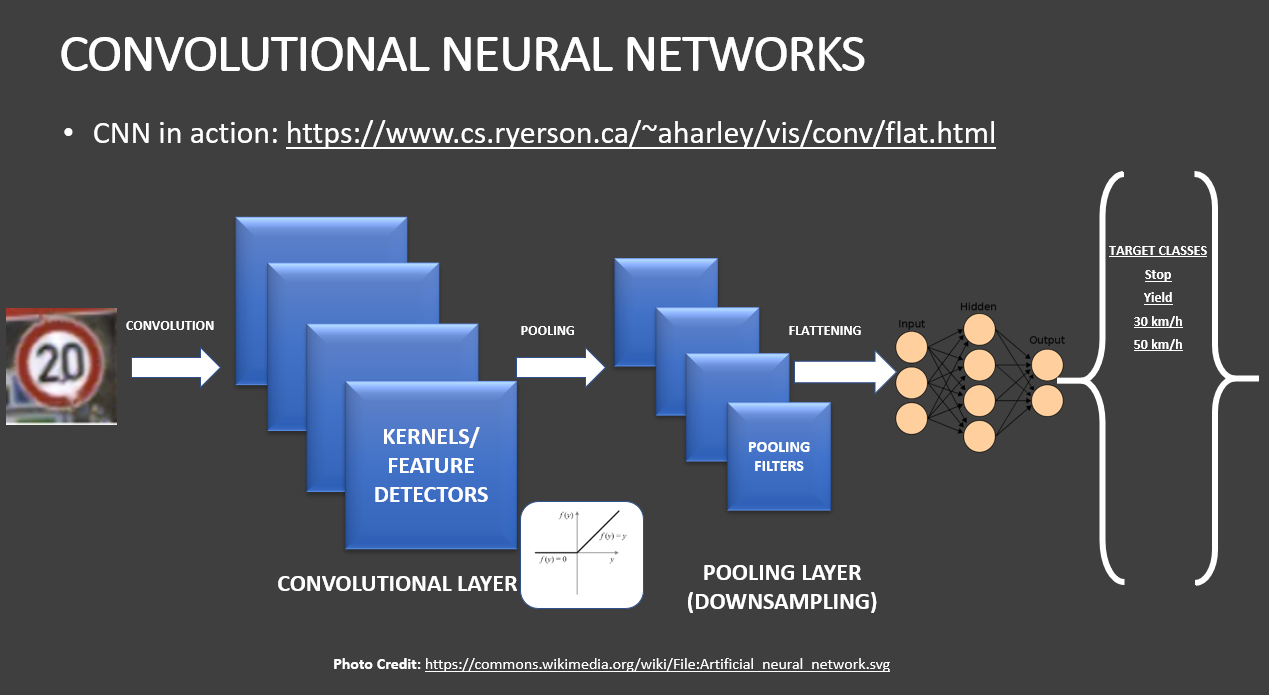

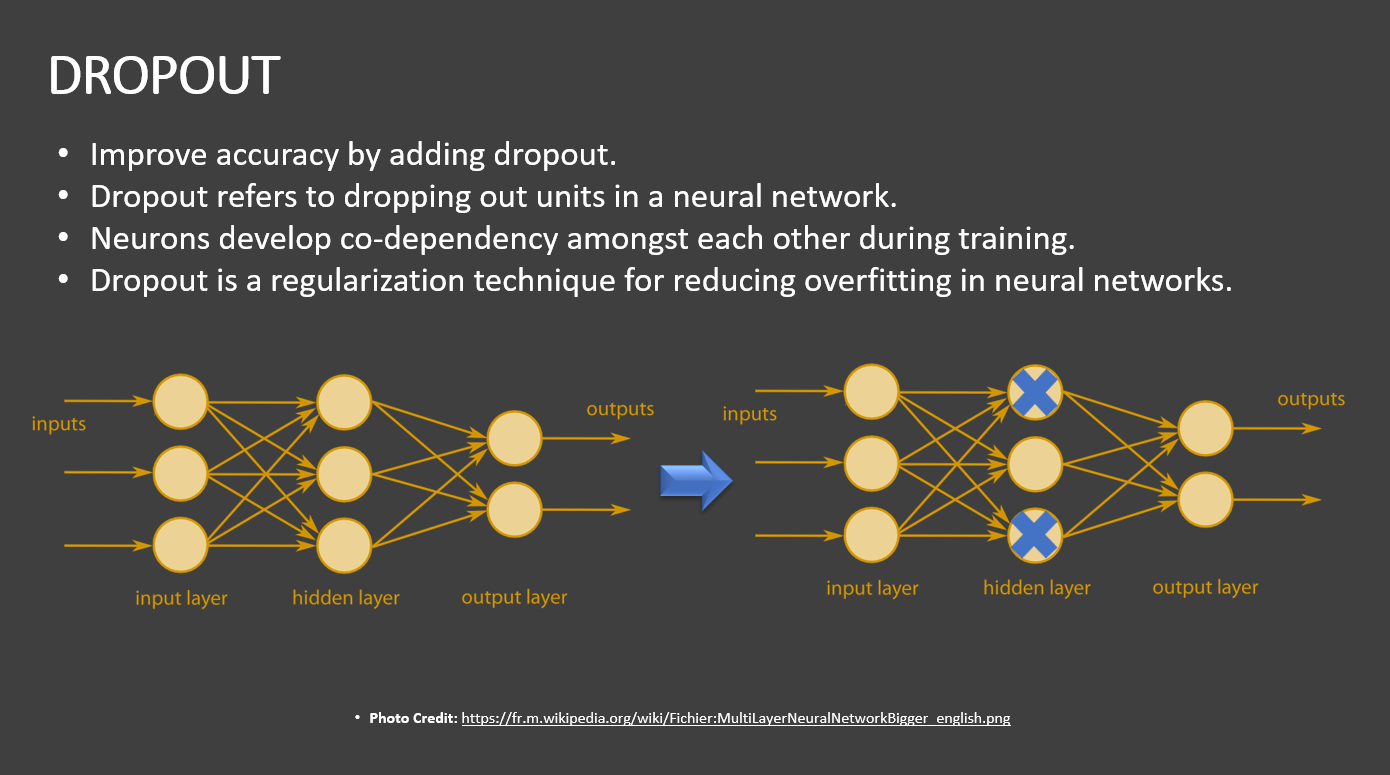

In [30]:
from tensorflow.keras import datasets, models, layers

In [34]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation = "relu", input_shape = (32, 32, 1)),
    layers.AveragePooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(16, (5, 5), activation = "relu"),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(120, activation = "relu"),
    layers.Dense(84, activation = "relu"),
    layers.Dense(43, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

## TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [35]:
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

#### By setting *verbose* 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

**verbose = 0** will show you nothing (silent)

**verbose = 1** will show you an animated progress bar like this:

=============================================

**verbose=2** will just mention the number of epoch like this: 1/10


In [36]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [37]:
callbacks = myCallback()
history = model.fit(X_train_gray_norm, y_train,
                   batch_size = 500,
                   epochs = 30,
                   verbose = 1,
                   validation_data = (X_valid_gray_norm, y_valid),
                   callbacks = [callbacks]
                   )

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 25s 711us/sample - loss: 3.1844 - accuracy: 0.1669 - val_loss: 2.7257 - val_accuracy: 0.2846
Epoch 2/30
34799/34799 [==============================] - 21s 617us/sample - loss: 1.8870 - accuracy: 0.4688 - val_loss: 1.6154 - val_accuracy: 0.5170
Epoch 3/30
34799/34799 [==============================] - 22s 626us/sample - loss: 1.2096 - accuracy: 0.6434 - val_loss: 1.1567 - val_accuracy: 0.6776
Epoch 4/30
34799/34799 [==============================] - 21s 614us/sample - loss: 0.9005 - accuracy: 0.7330 - val_loss: 0.8804 - val_accuracy: 0.7488
Epoch 5/30
34799/34799 [==============================] - 21s 613us/sample - loss: 0.7216 - accuracy: 0.7913 - val_loss: 0.7641 - val_accuracy: 0.7884
Epoch 6/30
34799/34799 [==============================] - 22s 627us/sample - loss: 0.6212 - accuracy: 0.8205 - val_loss: 0.6557 - val_accuracy: 0.8197
Epoch 7/30
34799/34799 [=====================

In [38]:
# save the model
models.save_model(model, "traffic_sign.hdf5")

## ASSESS TRAINED CNN MODEL PERFORMANCE

#### Load the model

In [39]:
model = models.load_model("traffic_sign.hdf5")

In [40]:
test_loss, test_acc = model.evaluate(X_test_gray_norm, y_test)
print(test_loss, test_acc)

12630/12630 [==============================] - 5s 367us/sample - loss: 0.6731 - accuracy: 0.8784
0.6731446273158868 0.87838477


In [33]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_attribute_sentinel',
 '_autocast',
 '_base_init',
 '_build_input_shape',
 '_build_model_with_inputs',
 '_cache_output_metric_attributes',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_check_call_args',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_clear_losse

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

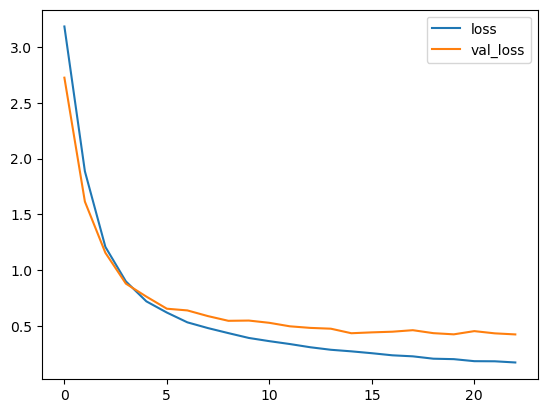

In [42]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend();

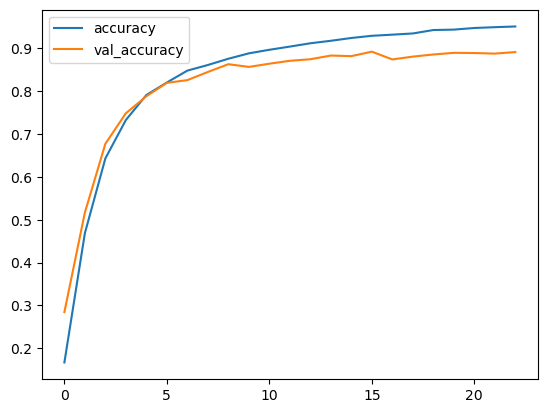

In [43]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend();

In [44]:
from sklearn.metrics import confusion_matrix

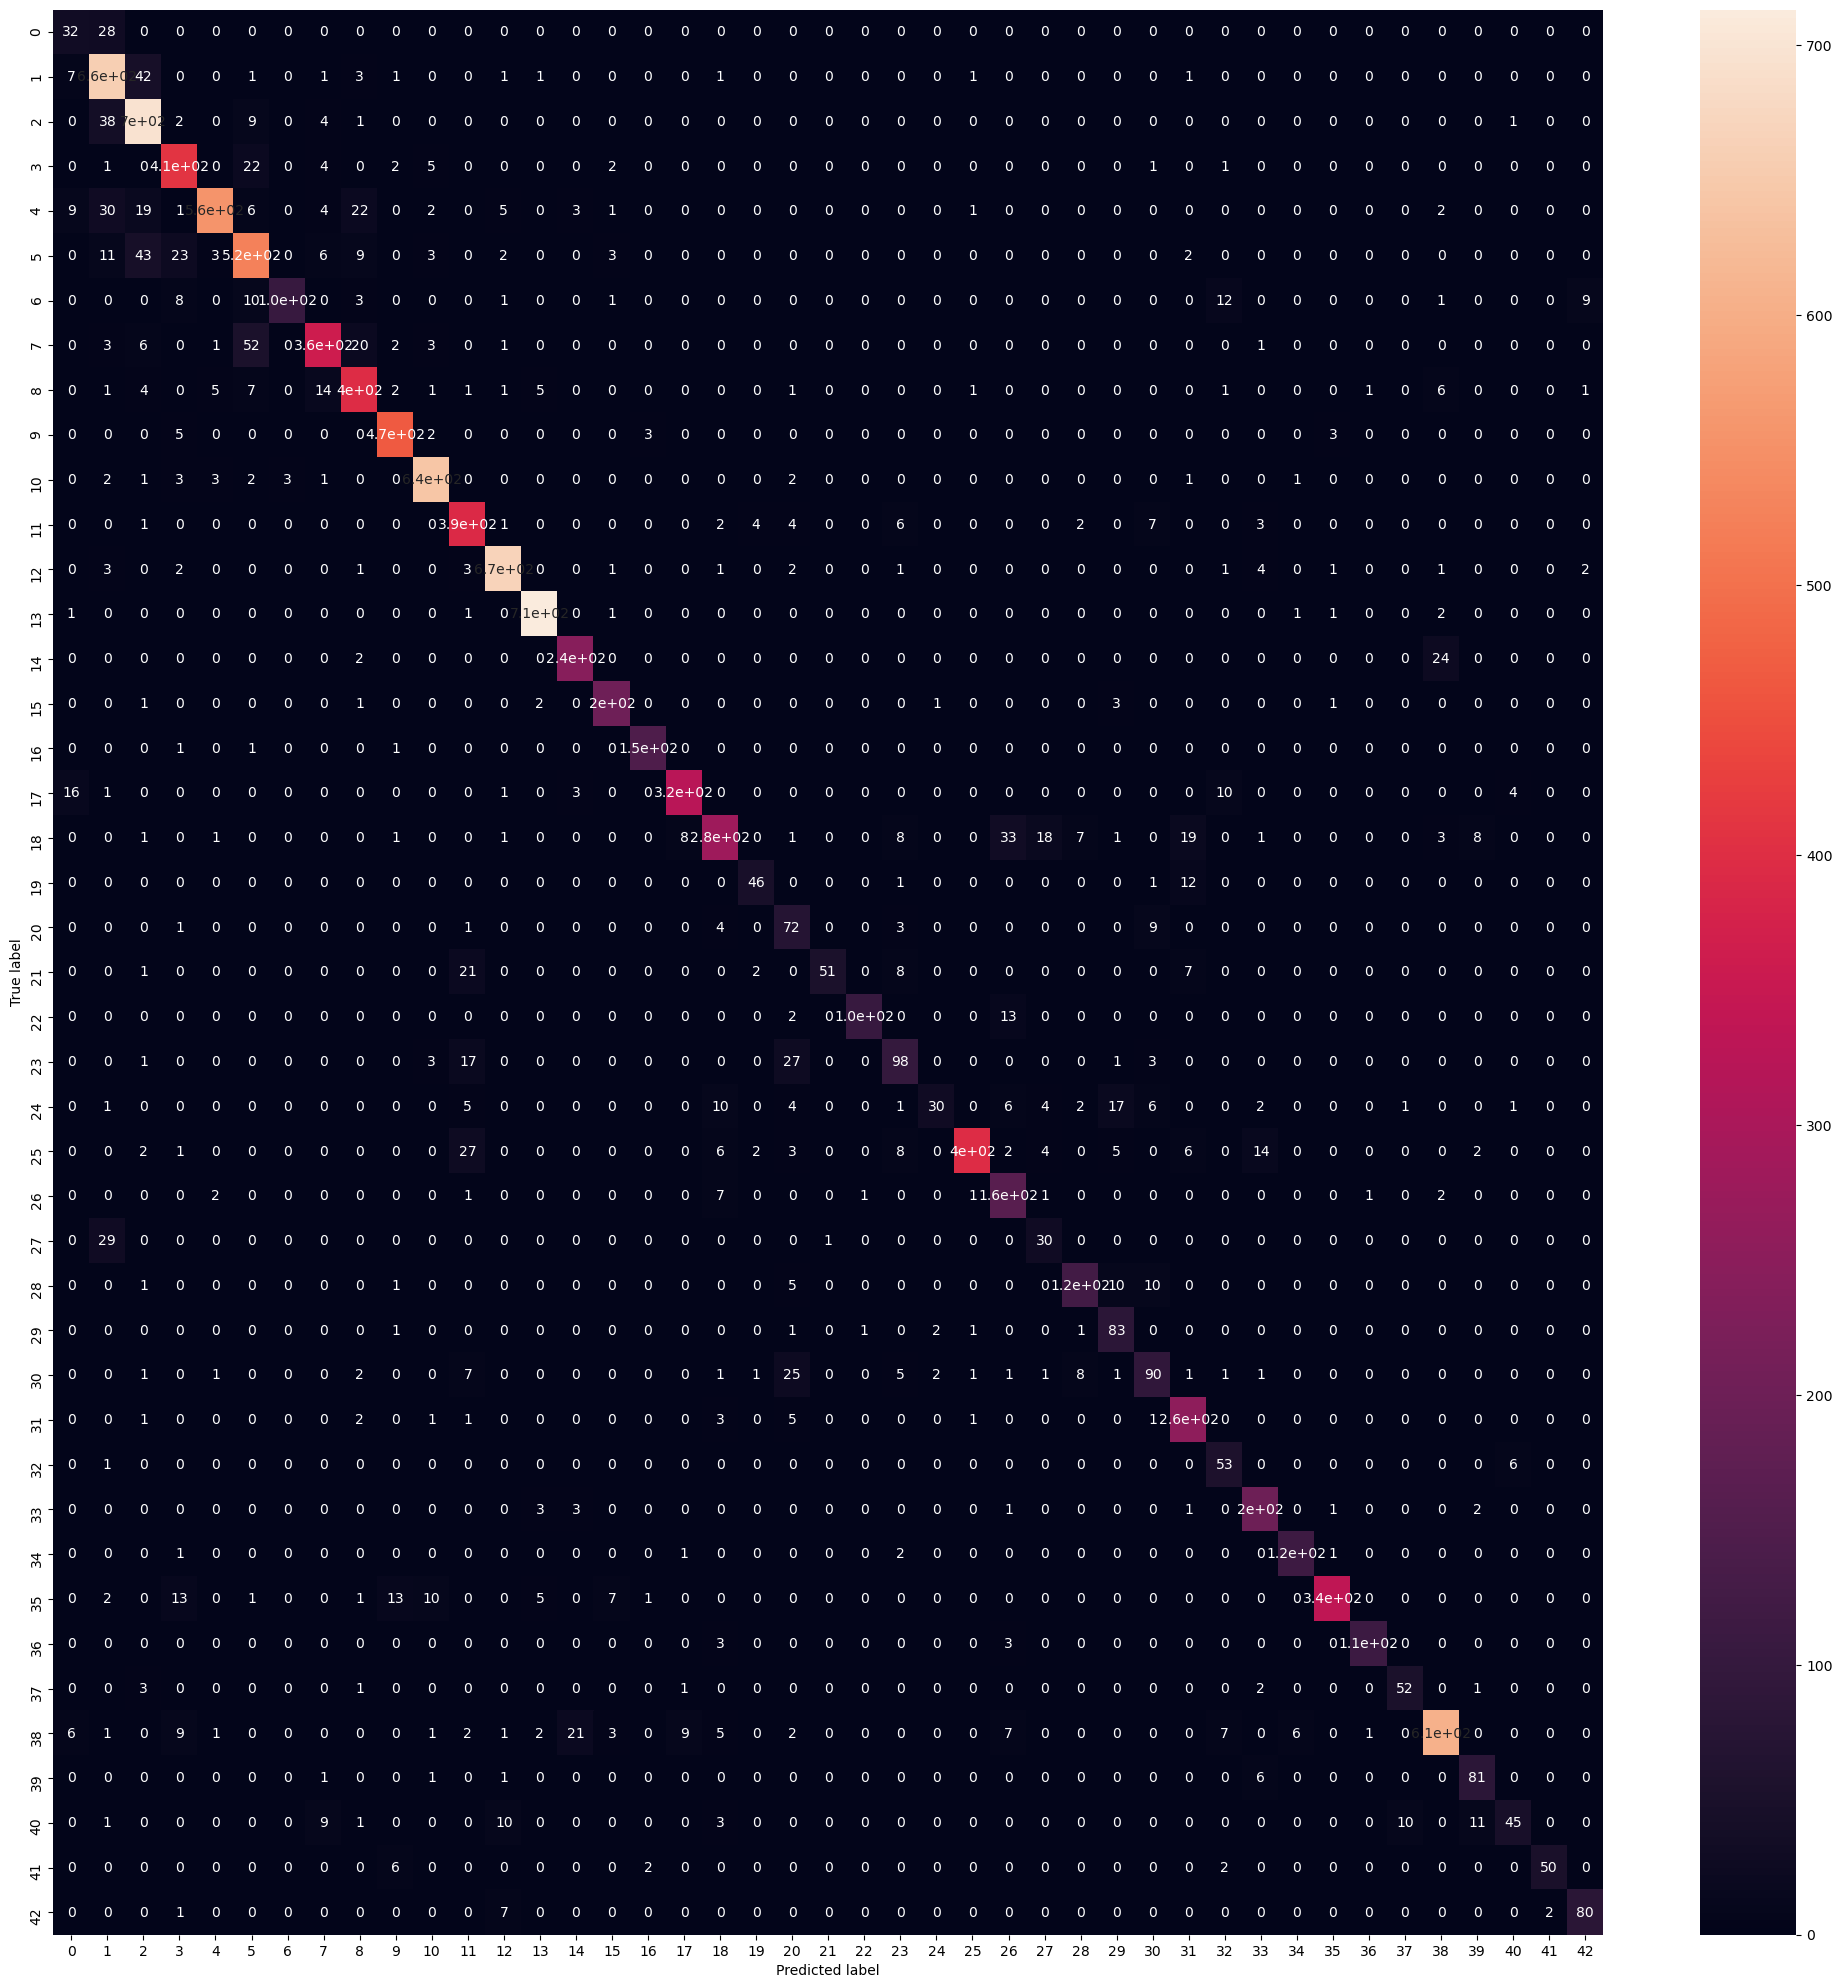

In [46]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

fig, ax = plt.subplots(figsize=(25, 25))

cm = confusion_matrix(y_true, predicted_classes)
ax = sns.heatmap(cm, annot = True)
ax.set(xlabel="Predicted label", ylabel="True label");

classes = 0, 19, 21, 24, 27, 29, 32, 37, 39, 41, 42 < 300 training image.

### misclassified images

In [115]:
wrong_prediction = np.where(predicted_classes != y_true)
len(wrong_prediction[0])

1536

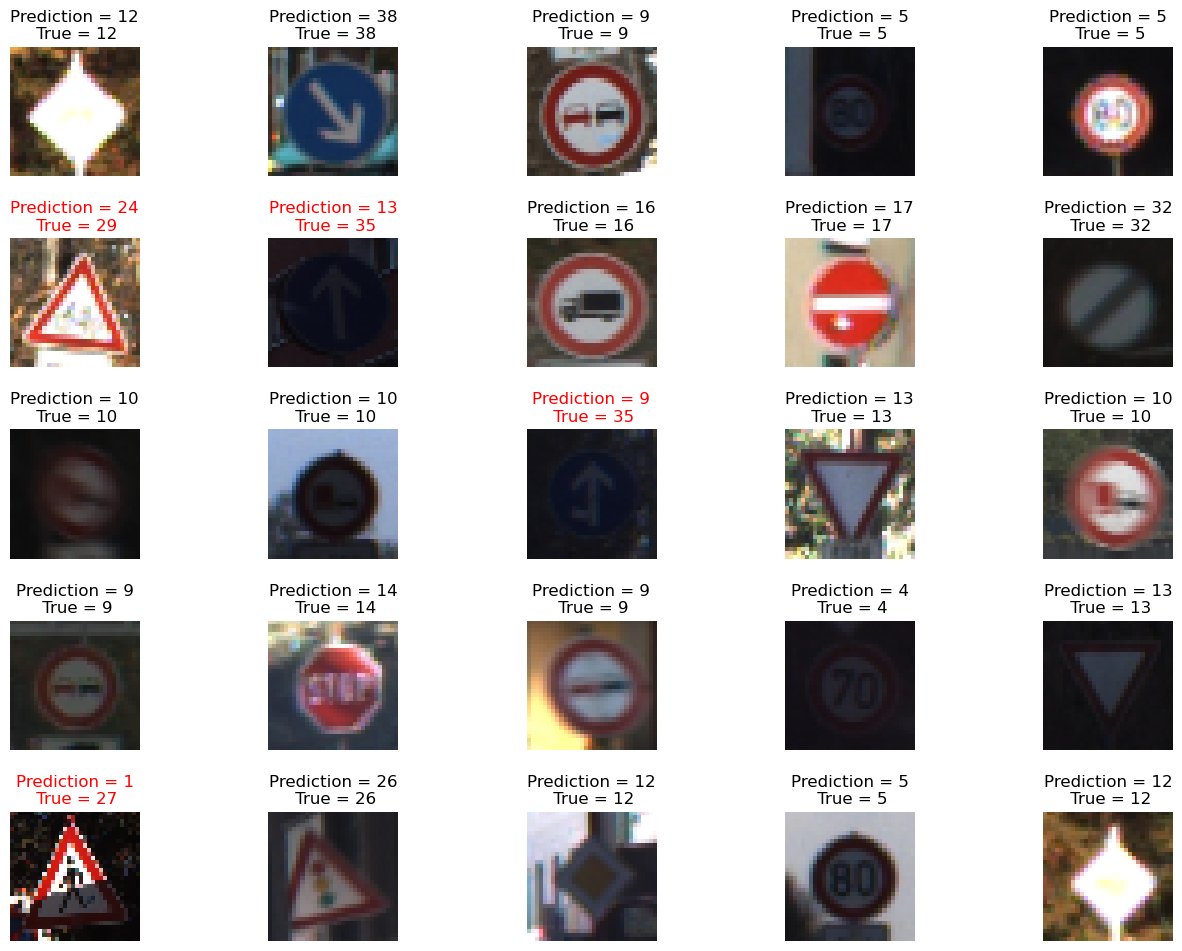

In [53]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15, 12))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(range(X_test.shape[0]))
    axi.imshow(X_test[idx])
    axi.set_title(f"Prediction = {predicted_classes[idx]}\n True = {y_true[idx]}",
                      color="black" if y_test[idx] == predicted_classes[idx] else "red")
    axi.axis("off")
    axi.set(xticks=[], yticks=[])
    
plt.subplots_adjust(wspace = 1)

### Appendix
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

In [29]:
my_model = models.load_model("traffic_sign.hdf5")

In [30]:
type(my_model)

tensorflow.python.keras.engine.sequential.Sequential

In [54]:
import cv2

In [57]:
cap = cv2.imread("./contents/stop2.jpeg")

In [58]:
cap.shape

(2592, 2592, 3)

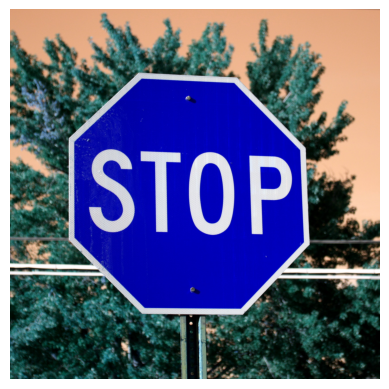

In [60]:
plt.imshow(cap)
plt.axis("off");

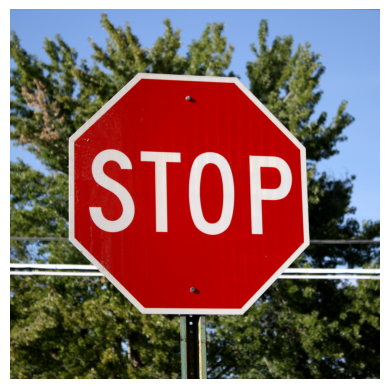

In [63]:
plt.imshow(cv2.cvtColor(cap, cv2.COLOR_BGR2RGB))
plt.axis("off");

#### resize images, as training image size was: 32*32

In [68]:
resize_cap = cv2.resize(cap, (32, 32))
resize_cap.shape

(32, 32, 3)

In [69]:
# cap_gray = cv2.cvtColor(resize_cap, cv2.COLOR_BGR2GRAY, keep)
gray_cap = np.sum(resize_cap/3, axis=2, keepdims=True)
gray_cap.shape

(32, 32, 1)

In [70]:
norm_cap = (gray_cap - 128)/128
norm_cap.shape

(32, 32, 1)

In [71]:
reshaped_norm_cap = np.array([norm_cap])
reshaped_norm_cap.shape

(1, 32, 32, 1)

In [75]:
prediction = model.predict_classes(reshaped_norm_cap)

In [76]:
prediction

array([14], dtype=int64)

In [79]:
int(prediction)

14

In [80]:
sign_labels[int(prediction)]

'Stop'

## Training without converting to grayscale

In [64]:
#rb = read binary #wb = write binary #.p extension = pickle extension
with open("./data/train.p", mode = "rb") as training_data:
    train = pickle.load(training_data)
with open("./data/valid.p", mode = "rb") as validation_data:
    valid = pickle.load(validation_data)
with open("./data/test.p", mode = "rb") as testing_data:
    test = pickle.load(testing_data)

In [67]:
X_train, y_train = train["features"], train["labels"]
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]

In [68]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

In [70]:
X_train.shape, X_valid.shape, X_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [71]:
y_train.shape, y_valid.shape, y_test.shape

((34799,), (4410,), (12630,))

### Normalizing the X-data

In [72]:
X_train, X_valid, X_test = X_train/255.0, X_valid/255.0, X_test/255.0

### using `keras functional API`

In [77]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, AveragePooling2D
from tensorflow.keras.models import Model

In [75]:
X_train[0].shape

(32, 32, 3)

In [84]:
i = Input(X_train[0].shape)

x = Conv2D(8, (3, 3), activation = "relu")(i)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation = "relu")(x)
x = BatchNormalization()(x)
x = AveragePooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(120, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(86, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(43, activation = "softmax")(x)

model = Model(i, x)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 8)         32        
_________________________________________________________________
average_pooling2d_5 (Average (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
batch_normalization_7 (Batch (None, 13, 13, 16)        64        
_________________________________________________________________
average_pooling2d_6 (Average (None, 6, 6, 16)          0   

In [85]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [86]:
r = model.fit(X_train,
              y_train,
              batch_size = 500,
              epochs = 30,
              validation_data = (X_valid, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 63s 2ms/sample - loss: 2.5053 - accuracy: 0.3258 - val_loss: 3.5312 - val_accuracy: 0.1626
Epoch 2/30
34799/34799 [==============================] - 43s 1ms/sample - loss: 1.2307 - accuracy: 0.6229 - val_loss: 3.1732 - val_accuracy: 0.1943
Epoch 3/30
34799/34799 [==============================] - 43s 1ms/sample - loss: 0.7397 - accuracy: 0.7647 - val_loss: 2.7191 - val_accuracy: 0.2875
Epoch 4/30
34799/34799 [==============================] - 41s 1ms/sample - loss: 0.5086 - accuracy: 0.8373 - val_loss: 2.0638 - val_accuracy: 0.4356
Epoch 5/30
34799/34799 [==============================] - 43s 1ms/sample - loss: 0.3753 - accuracy: 0.8830 - val_loss: 1.5646 - val_accuracy: 0.5626
Epoch 6/30
34799/34799 [==============================] - 42s 1ms/sample - loss: 0.3030 - accuracy: 0.9046 - val_loss: 0.8816 - val_accuracy: 0.7517
Epoch 7/30
34799/34799 [==============================] -

#### save the model

In [87]:
models.save_model(model, "traffic_sign-2.hdf5")

In [88]:
model = models.load_model("traffic_sign-2.hdf5")

In [89]:
model.evaluate(X_test, y_test)

12630/12630 [==============================] - 18s 1ms/sample - loss: 0.2589 - accuracy: 0.9418


[0.2588776395842728, 0.94180524]

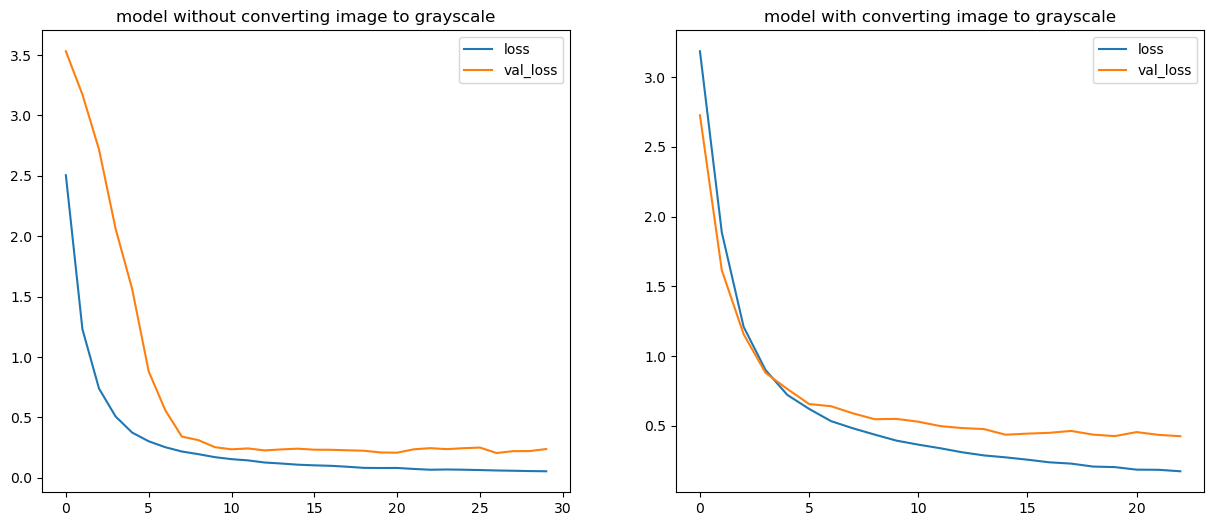

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

ax1.plot(r.history["loss"], label="loss")
ax1.plot(r.history["val_loss"], label="val_loss")
ax1.set_title("model without converting image to grayscale")
ax1.legend()

ax2.plot(history.history["loss"], label="loss")
ax2.plot(history.history["val_loss"], label="val_loss")
ax2.set_title("model with converting image to grayscale")
ax2.legend();

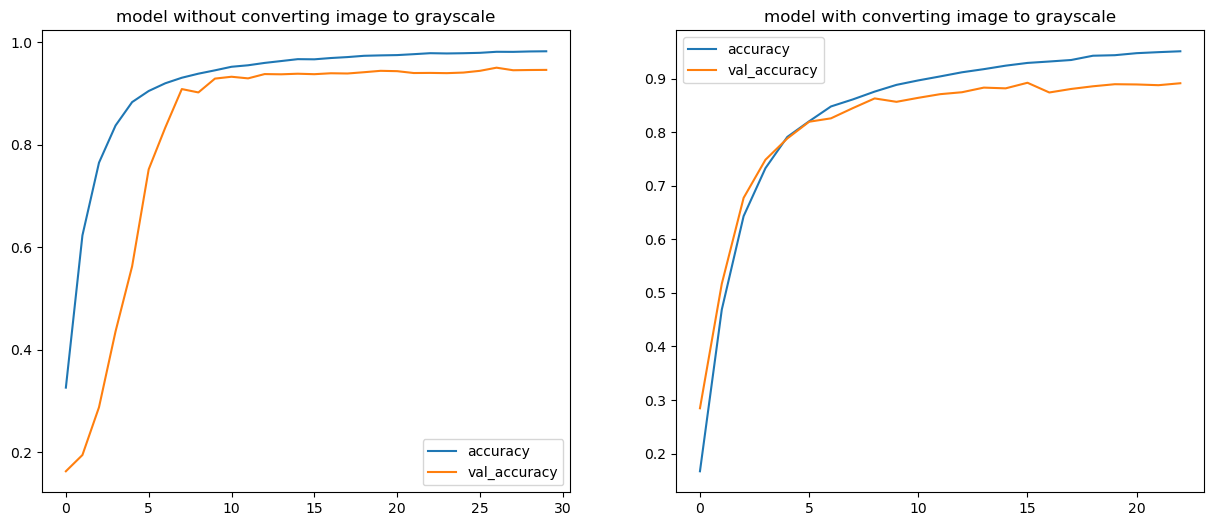

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

ax1.plot(r.history["accuracy"], label="accuracy")
ax1.plot(r.history["val_accuracy"], label="val_accuracy")
ax1.set_title("model without converting image to grayscale")
ax1.legend()

ax2.plot(history.history["accuracy"], label="accuracy")
ax2.plot(history.history["val_accuracy"], label="val_accuracy")
ax2.set_title("model with converting image to grayscale")
ax2.legend();

In [103]:
y_pred = model.predict(X_test)
y_test.shape, y_pred.shape

((12630,), (12630, 43))

In [104]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(12630,)

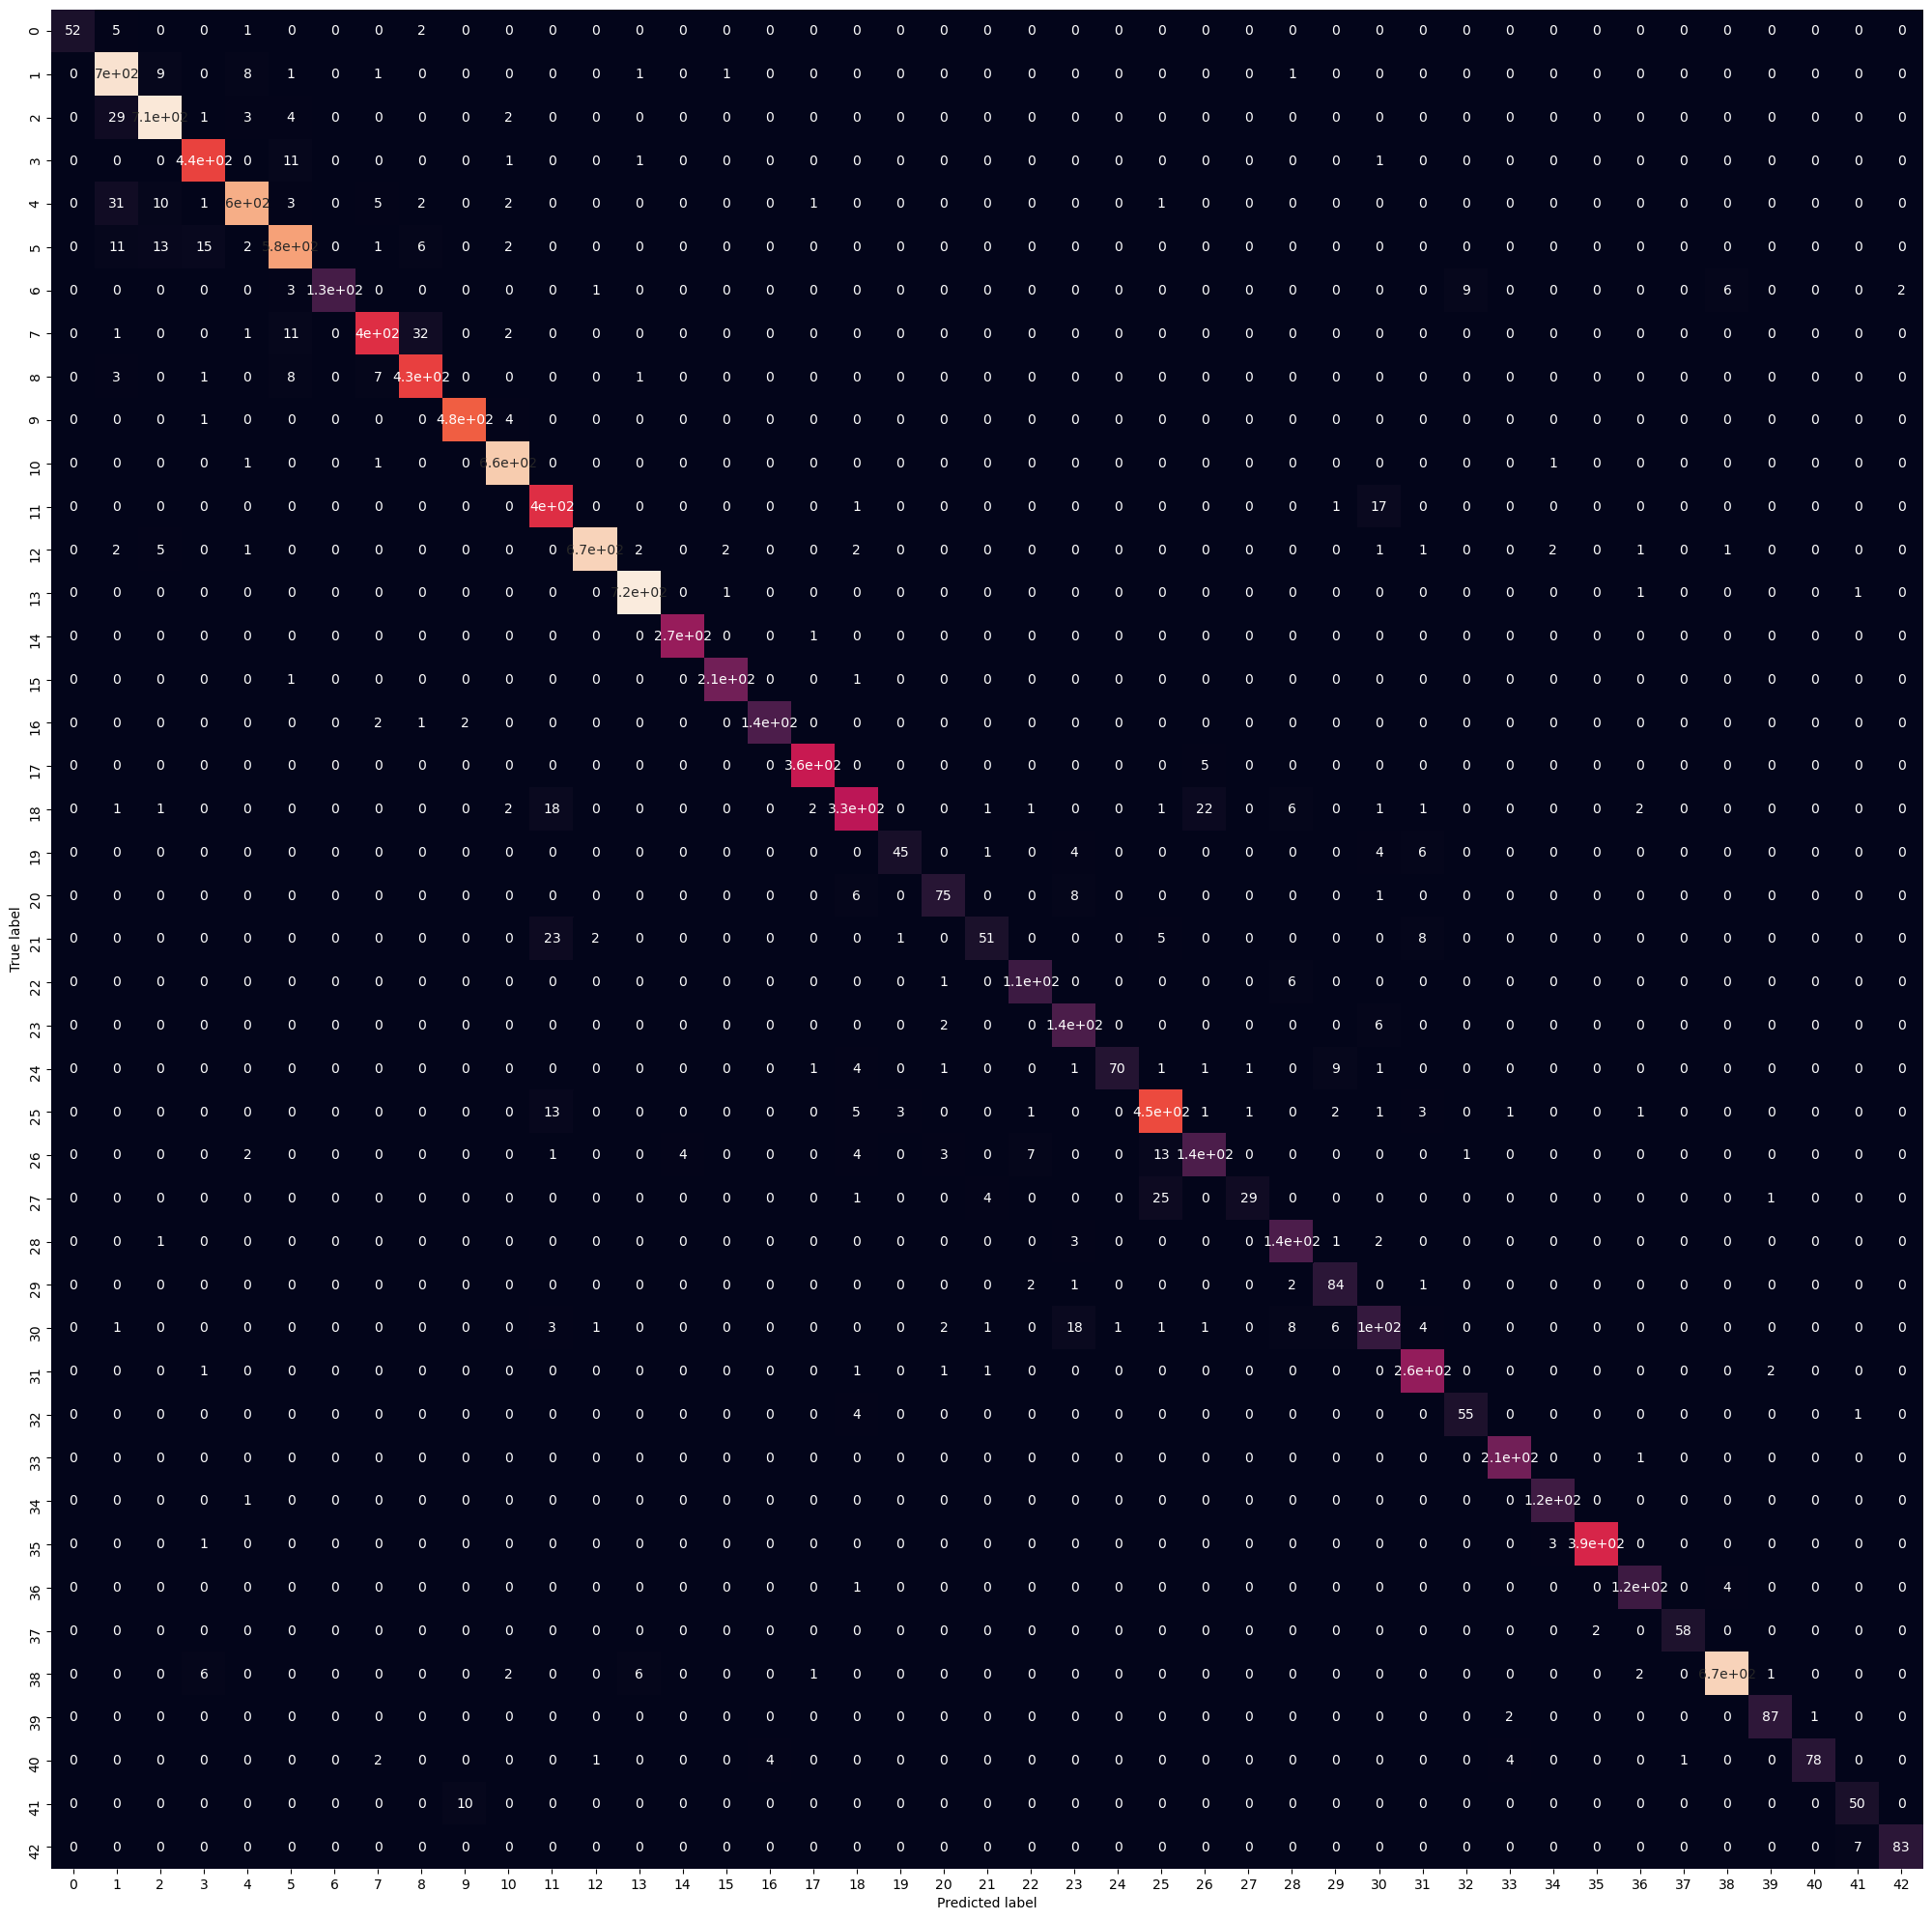

In [106]:
fig, ax = plt.subplots(figsize=(25, 25))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, cbar=False)
ax.set(xlabel="Predicted label", ylabel="True label");

### misclassified images

In [107]:
missclassified_idx = np.where(y_pred != y_test)
type(missclassified_idx)

tuple

In [108]:
len(missclassified_idx[0])

735

#### observation
In the previous model $1536$ images were misclassified. So obviously the $2nd$  model performs better than the $1st$ one

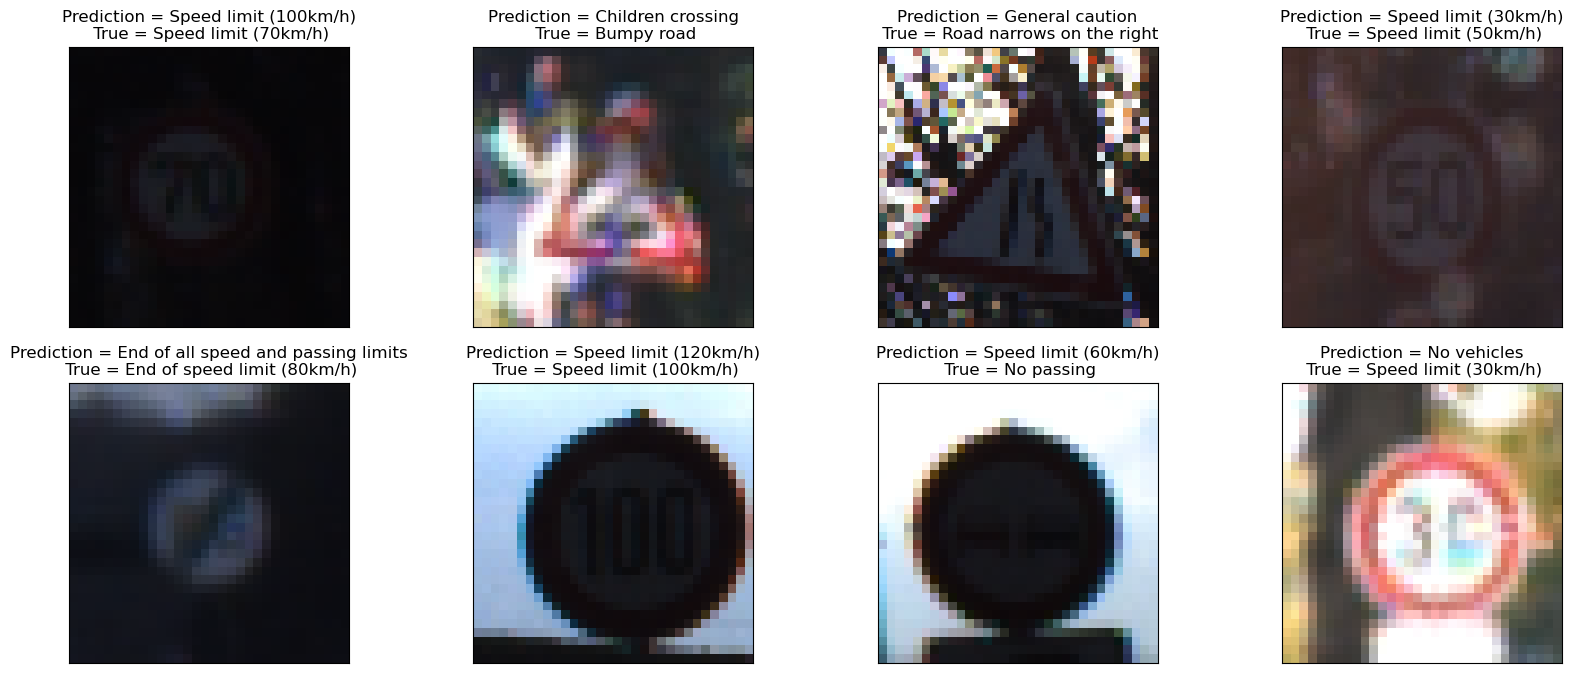

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

for _, axi in enumerate(ax.flat):
    idx = np.random.choice(missclassified_idx[0])
    axi.imshow(X_test[idx])
    axi.set_title(f"Prediction = {sign_labels[y_pred[idx]]}\n True = {sign_labels[y_test[idx]]}")
    axi.set(xticks=[], yticks=[])